# Predict Silicon Price

### Investigating the relationship between the stock prices of technology companies and the price of silicon

---

imports the necessary libraries for data manipulation, analysis, and visualization.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

defines a list of stock tickers, downloads the stock data using the `yfinance` library, and creates a Pandas DataFrame with the stock closing prices.

In [2]:
# Define a list of ticker symbols for clarity and maintainability
tickers = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOG', 'INTC', 'QCOM', 'KRX', 'AMD', 'ORCL']

# Download stock data in a more efficient way using a loop
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start='2018-01-01', end='2024-06-06')['Close']

# Create a DataFrame directly from the dictionary
df = pd.DataFrame(stock_data)

df.head(3)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,KRX,AMD,ORCL
Date,,,,,,,,,,
2018-01-02,43.064999,21.368668,85.949997,4.98375,53.250000,46.849998,65.199997,37.080002,10.98,46.630001
2018-01-03,43.057499,21.150000,86.349998,5.31175,54.124001,45.259998,65.940002,37.380001,11.55,47.709999
2018-01-04,43.257500,20.974667,87.110001,5.33975,54.320000,44.430000,66.029999,38.500000,12.12,48.180000


creates a line plot to visualize the stock prices over time for the selected tickers.

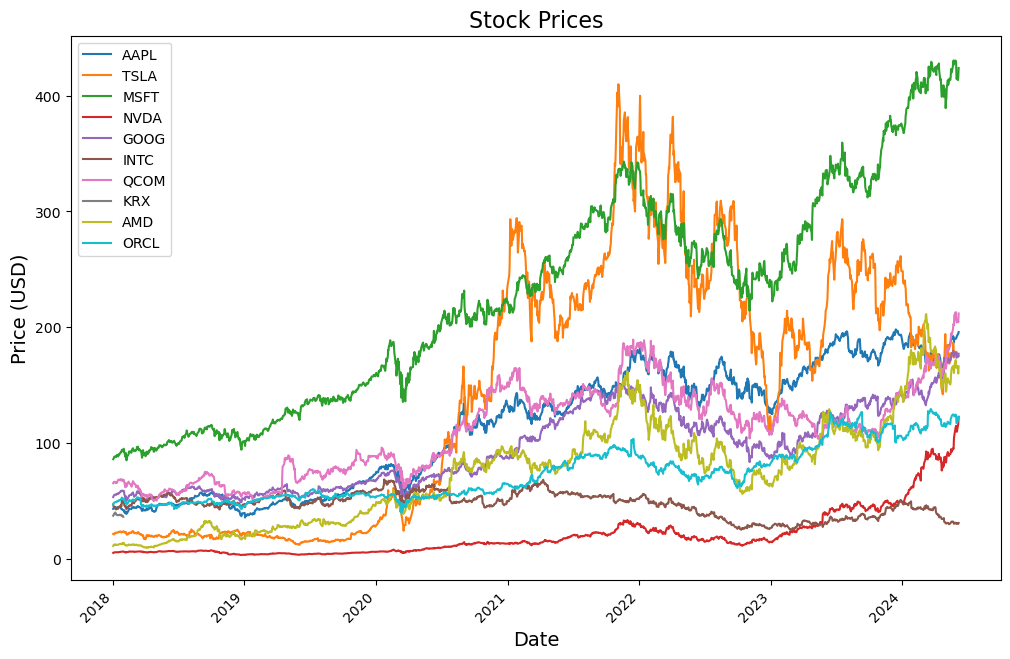

In [3]:
# creates a line plot to visualize the stock prices over time for the selected tickers.

fig, ax = plt.subplots(figsize=(12, 8))
for ticker in tickers:
    df[ticker].plot(ax=ax, label=ticker)

# Set the title and axis labels
ax.set_title('Stock Prices', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price (USD)', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Show the plot
plt.show()

---

loads the silicon price data from an Excel file, creates new columns for the converted dollar and euro prices, and visualizes the silicon prices over time using line plots.

In [4]:
silicon_price = pd.read_excel('./Silicon_price.xlsx')

silicon_price['Dollar_Price_rotate'] = silicon_price['U.S. Price'] * 537.5
silicon_price['Euro_Price_rotate'] = silicon_price['U.S. Price'] * 687.2

silicon_price.head(3)

,Date,U.S. Price,Euro Price,Dollar_Price_rotate,Euro_Price_rotate
0,2018-01-01,3.05,2.35,1639.375,2095.960
1,2018-02-01,3.13,2.39,1682.375,2150.936
2,2018-03-01,3.15,2.40,1693.125,2164.680


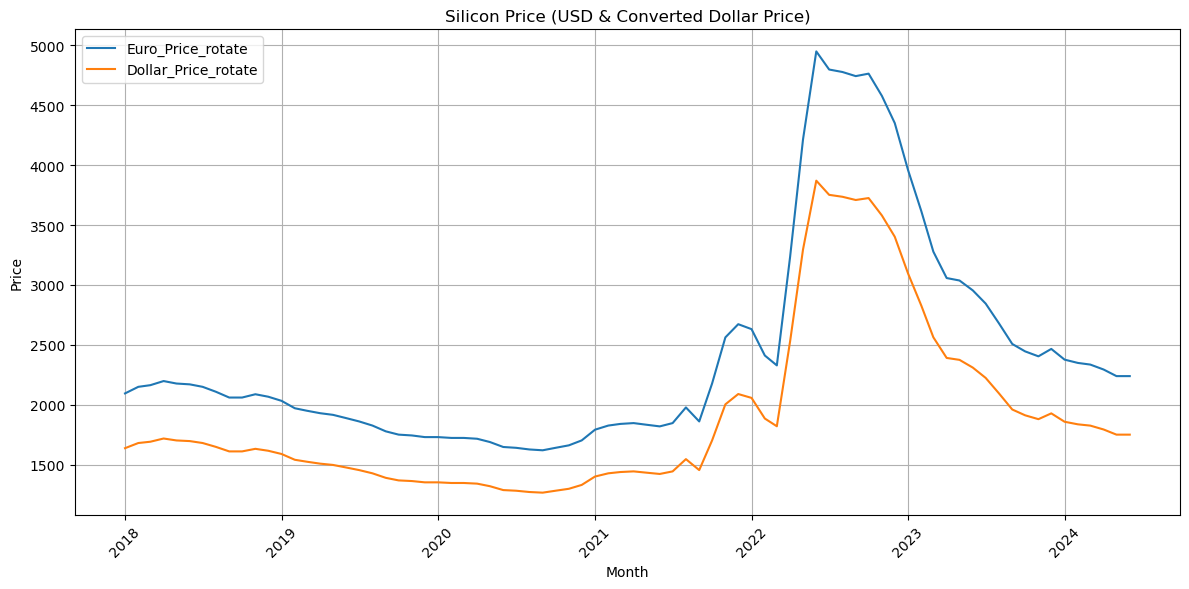

In [5]:
data_to_plot = ['Euro_Price_rotate', 'Dollar_Price_rotate']

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(silicon_price['Date'], silicon_price[data_to_plot])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Silicon Price (USD & Converted Dollar Price)')

# Add labels for each line
plt.legend(data_to_plot, loc='upper left')

# Rotate x-axis labels for better readability with many data points
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

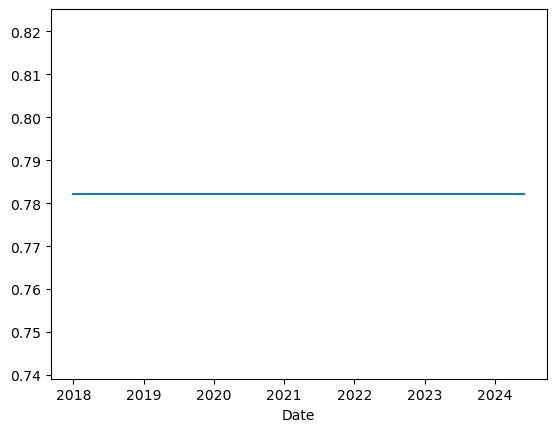

In [6]:
sns.lineplot(
    x=silicon_price['Date'], y=(silicon_price['Dollar_Price_rotate'] / silicon_price['Euro_Price_rotate'])
)

# Missing Value Handling and Clean Data

In [7]:
df.isna().sum()

AAPL       0
TSLA       0
MSFT       0
NVDA       0
GOOG       0
INTC       0
QCOM       0
KRX     1596
AMD        0
ORCL       0
dtype: int64

In [8]:
df['KRX'] = df['KRX'].interpolate(method='linear')

silicon_price.set_index('Date', inplace=True)
df['Price_ratio'] = silicon_price['Euro_Price_rotate']
df['Price_ratio'] = df['Price_ratio'].interpolate(method='linear')
df.isna().sum()

AAPL            0
TSLA            0
MSFT            0
NVDA            0
GOOG            0
INTC            0
QCOM            0
KRX             0
AMD             0
ORCL            0
Price_ratio    21
dtype: int64

In [9]:
df = df.dropna()

# Start ML Modeling
---

imports various machine learning models and functions from the scikit-learn library.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [11]:
abs(df.corr()).style.background_gradient(cmap='Greens')

,AAPL,TSLA,MSFT,NVDA,GOOG,INTC,QCOM,KRX,AMD,ORCL,Price_ratio
AAPL,1.000000,0.895063,0.958235,0.734096,0.926299,0.481595,0.868745,0.182349,0.912089,0.888440,0.457143
TSLA,0.895063,1.000000,0.810986,0.481609,0.858653,0.294693,0.862500,0.149390,0.796981,0.693404,0.471181
MSFT,0.958235,0.810986,1.000000,0.857198,0.958143,0.399195,0.863385,0.188305,0.969140,0.936622,0.318661
NVDA,0.734096,0.481609,0.857198,1.000000,0.794069,0.421332,0.652763,0.089496,0.844461,0.877797,0.137948
GOOG,0.926299,0.858653,0.958143,0.794069,1.000000,0.318125,0.882605,0.154692,0.929227,0.895781,0.314101
INTC,0.481595,0.294693,0.399195,0.421332,0.318125,1.000000,0.232395,0.000687,0.297706,0.503747,0.700739
QCOM,0.868745,0.862500,0.863385,0.652763,0.882605,0.232395,1.000000,0.159132,0.899496,0.707605,0.299319
KRX,0.182349,0.149390,0.188305,0.089496,0.154692,0.000687,0.159132,1.000000,0.184539,0.127641,0.038392
AMD,0.912089,0.796981,0.969140,0.844461,0.929227,0.297706,0.899496,0.184539,1.000000,0.872283,0.230390
ORCL,0.888440,0.693404,0.936622,0.877797,0.895781,0.503747,0.707605,0.127641,0.872283,1.000000,0.294770


In [12]:
X = df[tickers]
y = df['Price_ratio']

X_train = X[:-120]
X_test = X[-120:]
y_train = y[:-120]
y_test = y[-120:]

---

trains a linear regression model on the training data and evaluates its performance on the test data using the R-squared metric.

In [13]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(f'r2_ Linear Reggresion Model: {r2_score(y_test, y_pred)}')

r2_ Linear Reggresion Model: -2035.3280877196041


using StandardScaler, trains a Support Vector Regression (SVR) model with an RBF kernel on the scaled training data, and evaluates its performance on the test data using the R-squared metric.

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')  # Using Radial basis function kernel
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print(f'r2_Support Vector Regression: {r2_score(y_test, y_pred_svr)}')


r2_Support Vector Regression: -0.23244152637557103


trains a Decision Tree Regressor model on the training data and evaluates its performance on the test data using the R-squared metric.

In [15]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print(f'r2_Decision Tree Regressor: {r2_score(y_test, y_pred_dtr)}')


r2_Decision Tree Regressor: -10.110643570058505


trains a Random Forest Regressor model with 100 estimators on the training data and evaluates its performance on the test data using the R-squared metric.

In [16]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print(f'r2_Random Forest Regressor: {r2_score(y_test, y_pred_rfr)}')

r2_Random Forest Regressor: -9.907892893053361


trains a Ridge Regression model with an alpha value of 1.0 on the training data and evaluates its performance on the test data using the R-squared metric.

In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(f'r2_Ridge Regression: {r2_score(y_test, y_pred_ridge)}')

r2_Ridge Regression: -2035.200509378413


trains a Lasso model with an alpha value of 1.0 on the training data and evaluates its performance on the test data using the R-squared metric.

In [18]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print(f'r2_Lasso Regression: {r2_score(y_test, y_pred_lasso)}')

r2_Lasso Regression: -2035.5742183220007


trains a elastic net model with an alpha value of 1.0 & l1_ratio value of 0.5 on the training data and evaluates its performance on the test data using the R-squared metric.

In [19]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength; l1_ratio controls the mix of L1 and L2 regularization
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)

print(f'r2_Elastic Net Regression: {r2_score(y_test, y_pred_elastic_net)}')

r2_Elastic Net Regression: -2025.9666436761834


c:\Users\Mr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.474e+06, tolerance: 1.257e+05
  model = cd_fast.enet_coordinate_descent(
